# Capstone Project - Olympic Data Analysis Using Pyspark

### Introduction

##### In this Olympic data , 110 countries were participated in 49 sports from year 2000 to 2012. Data also contains player names with their age and number of gold , silver and brone medals, they won . With total medals they won.

|    |  Variable     |  Type    |
|----|:--------------|:---------|
| 1	 | Name	         |Categorical|	
| 2	 | Age	         |Numeric	 |
| 3	 | Country	     |Categorical|	
| 4	 | Year	         |Categorical|	
| 5	 | Date	         |Categorical|	
| 6	 | Sports	     |Numeric	 | 
| 7	 | Gold_medal	 |Numeric    |	
| 8	 | Silver_Medal  |Numeric    |	
| 9  | Bronze_medal	 |Numeric	 |
| 10 | Total_Medal	 |Numeric	 |

In [1]:
# Install pyspark
#pip install pyspark

In [2]:
# Initialize pyspark
from pyspark.sql import SparkSession

# Create spark session
spark = SparkSession.builder.appName('Project_1').getOrCreate()


## Q1. Write PySpark code to read olympix_data.csv file

In [3]:
# Import CSV format into dataframe 
data = spark.read.csv("D:/ExcelR Project/Project/2/olympic_datas.csv", header = True, inferSchema = True)
data.show

<bound method DataFrame.show of DataFrame[name: string, age: double, country: string, year: int, Date_Given: string, sports: string, gold_medal: int, silver_medal: int, brone_medal: int, total_medal: int]>

## Q2. Write PySpark code to print the Olympic Sports/games in the dataset.

In [4]:
# Get column data 
sports = data.select("sports").distinct().count()
sports

49

In [5]:
data.select('sports').distinct().show(n=49)

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

## Q3.Write PySpark code the total number of medals in each Olympic Sport/game

In [7]:
data.groupby('sports').sum('total_medal').show(n = 49)

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
|          Equestrian|             182|
|            Shooting|             192|


## Q4. Sort the result based on the total number of medals.

In [9]:
# Take SQL function as f 
import pyspark.sql.functions as f

# Use group by and sum for total medals
sport_total = data.groupby('sports').sum('total_medal')

# Use order by for ordering and also use desc or descending ordering
sport = sport_total.orderBy(f.desc('sum(total_medal)'))

# Show result
sport.show(n=49)

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|            Swimming|             765|
|           Athletics|             753|
|              Rowing|             576|
|            Football|             407|
|              Hockey|             387|
|          Ice Hockey|             384|
|            Handball|             351|
|            Canoeing|             333|
|           Waterpolo|             306|
|             Cycling|             306|
|          Basketball|             287|
|          Gymnastics|             282|
|          Volleyball|             279|
|             Fencing|             256|
|           Wrestling|             245|
|                Judo|             224|
|            Baseball|             216|
|             Sailing|             210|
|            Shooting|             192|
|              Boxing|             188|
|          Equestrian|             182|
|       Weightlifting|             180|


## Q5. Find the total number of medals won by each country in swimming.

In [23]:
# Filter rows on sports == Swimming 
data_1 = data.filter(data.sports == 'Swimming')

# Grouping by country
data_2 = data_1.groupby('country').sum('total_medal').orderBy(f.desc('sum(total_medal)'))

n = data_2.count()
data_2.show(n)

+-------------------+----------------+
|            country|sum(total_medal)|
+-------------------+----------------+
|      United States|             267|
|          Australia|             163|
|        Netherlands|              46|
|              Japan|              43|
|             France|              39|
|              China|              35|
|            Germany|              32|
|             Russia|              20|
|              Italy|              16|
|      Great Britain|              11|
|       South Africa|              11|
|             Sweden|               9|
|            Hungary|               9|
|             Brazil|               8|
|            Ukraine|               7|
|           Zimbabwe|               7|
|            Romania|               6|
|             Canada|               5|
|        South Korea|               4|
|              Spain|               3|
|            Tunisia|               3|
|             Poland|               3|
|            Austria|    

## Q6. Find the total number of medals won by each country in Skeleton.

In [29]:
# Filter rows on sports == Skelwton 
data_3 = data.filter(data.sports == 'Skeleton')

# Grouping by country
data_4 = data_3.groupby('country').sum('total_medal').orderBy(f.desc('sum(total_medal)'))

#Show data
data_4.show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Canada|               4|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|      Germany|               2|
|       Russia|               1|
|       Latvia|               1|
|      Austria|               1|
+-------------+----------------+



## Q7. Find the number of medals that the US won yearly.

In [33]:
# Filter data on the country mentioned
data_5 = data.filter(data.country == 'United States')

# Use group by year and sum of total medals
data_6 = data_5.groupby('year').sum('total_medal').orderBy(f.desc('sum(total_medal)'))

# Show Result
data_6.show()

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2008|             317|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2002|              84|
|2006|              52|
+----+----------------+



## Q8. Find the total number of medals won by each country.

In [39]:
# Use function f of SQL
import pyspark.sql.functions as f

# Use groupby then sum total medals
data_7 = data.groupby('country').sum('total_medal')

# Use order by and desc for descending order
country = data_7.orderBy(f.desc('sum(total_medal)'))

# Show Result
country.show(n = 110)

+--------------------+----------------+
|             country|sum(total_medal)|
+--------------------+----------------+
|       United States|            1312|
|              Russia|             768|
|             Germany|             629|
|           Australia|             609|
|               China|             530|
|              Canada|             370|
|               Italy|             331|
|       Great Britain|             322|
|              France|             318|
|         Netherlands|             318|
|         South Korea|             308|
|               Japan|             282|
|              Brazil|             219|
|               Spain|             205|
|              Norway|             192|
|                Cuba|             188|
|              Sweden|             181|
|             Hungary|             145|
|             Ukraine|             143|
|           Argentina|             140|
|             Romania|             123|
|             Finland|             118|


## Q9 Who was the oldest athlete in the olympics?

In [53]:
# Find the maximum age in the entire dataset
max_age = data.agg({'age': 'max'}).collect()[0][0]

# Filter the data to find the athlete with the maximum age
athlete_with_max_age = data.filter(data.age == max_age).select('name', 'age')

# Show the result
athlete_with_max_age.show()


+----------+----+
|      name| age|
+----------+----+
|Ian Millar|61.0|
+----------+----+



## Q10. Which country was he/she from?

In [56]:
# filter age variable
Age = data.filter(data.age == 61)

# show age
Age.show() 

+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar|61.0| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+



## Q11 plot the total number of medals in each Olympic Sport/game

In [57]:
# Import pandas for data analysis
import pandas as pd
# Import Matplotlib for data visualization
import matplotlib.pyplot as plt
# Import Seaborn for data visualization
import seaborn as sns

In [58]:
# Convert pyspark dataframe to pandas dataframe 
olympix = data.toPandas()

# To read 1st five rows
olympix.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


<Axes: title={'center': 'Total Medals By Sports'}, xlabel='sports'>

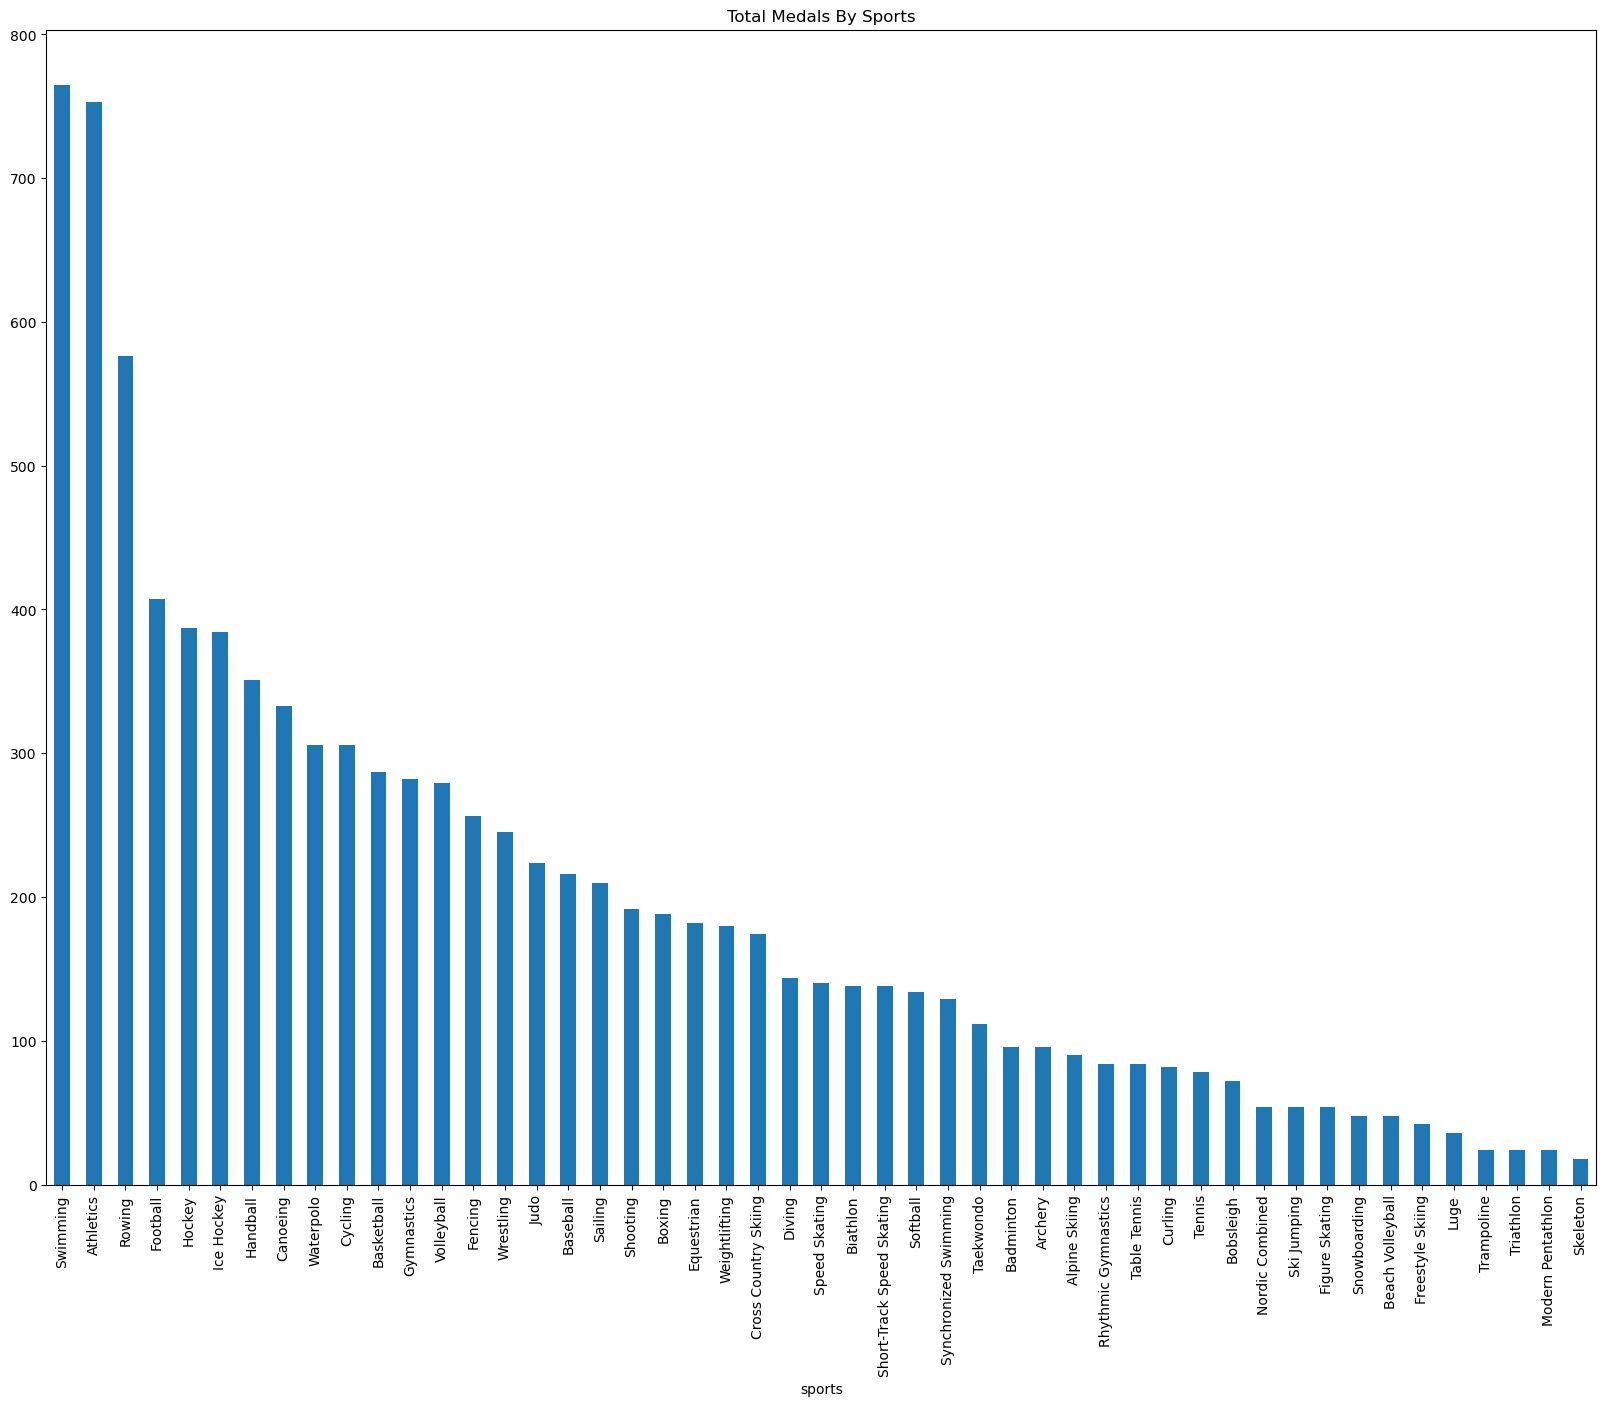

In [63]:
# Get the unique values of sports and total medals 
total_sports = olympix.groupby('sports')['total_medal'].sum().sort_values(ascending = False)

# Plot the bar graph
total_sports.plot(kind = 'bar', title = 'Total Medals By Sports', figsize = (20,15))


### Top 10 sports with total medals

Text(0, 0.5, 'Total Medals')

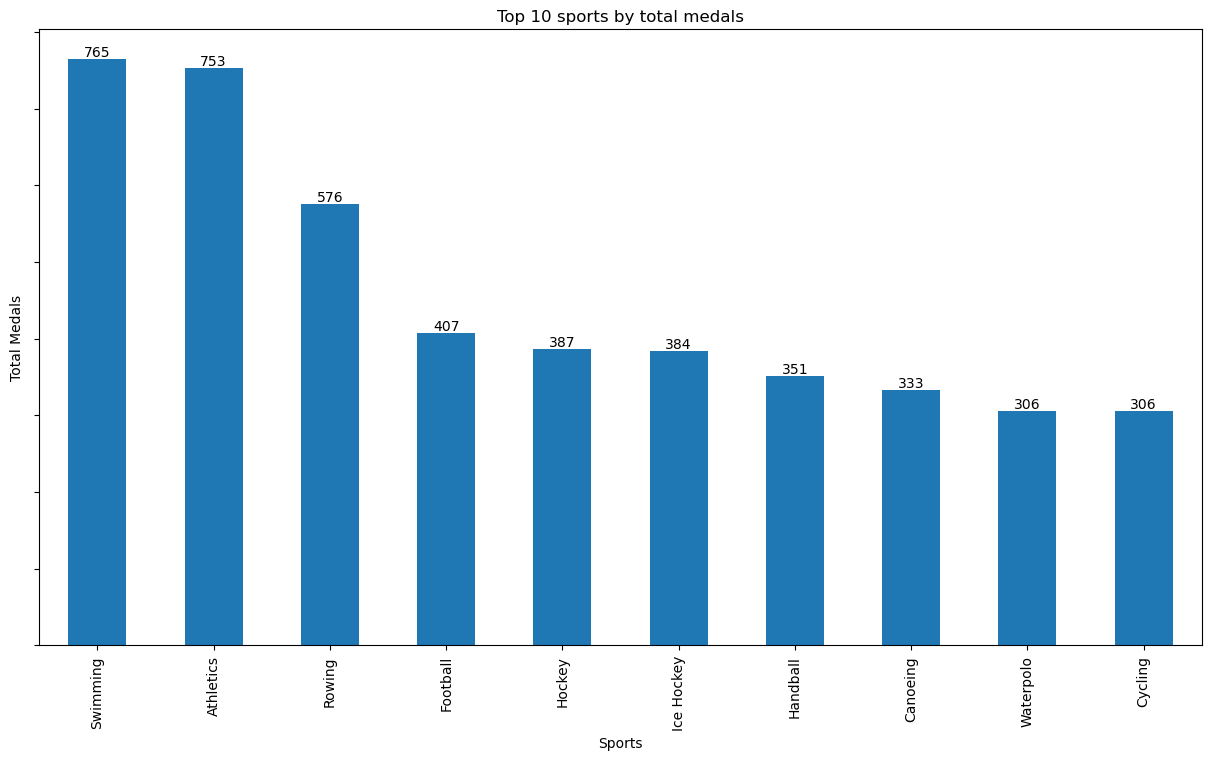

In [72]:
# To get the top 10 sports on sum of total medals
top_10_sports = olympix.groupby('sports')['total_medal'].sum().sort_values(ascending = False).head(10)

# Plot bar chart
top_10 = top_10_sports.plot(kind = 'bar', title = 'Top 10 sports by total medals', figsize = (15,8))

# To give data labels
for index, value in enumerate(top_10_sports):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom')

# Set tick labels
top_10.set_xticklabels(top_10_sports.index)
top_10.set_yticklabels([])

# Set axis label
top_10.set_xlabel('Sports')
top_10.set_ylabel('Total Medals')